# CSE 5520: Homework 3

This homework is to help you practice with data visualization fundamentals related to various
correlation analysis methods. You are expected to use these visualization techniques and others
in doing your final project. You are required to do this exercise in Python. All plots/graphs must
have titles and x-y coordinate tick labels and any necessary legend if desired. 

## **Part 1: Linear Regression**

Consider a simple set of data points {<2, 2 >, <3, 3 >, <4, 5>, <6, 4>}.

Step 1: Show the given <x, y> data points in a 2D plot.

Step 2: Draw the regression line over the plot shown in Step 1. Steps 1 and 2 should be done in one cell of Jupyter notebook.

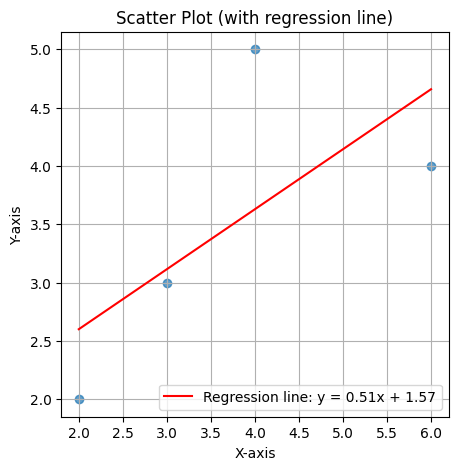

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# We plot and zip the points for future use
plot_points_2d = [(2, 2), (3, 3), (4, 5), (6, 4)]
x, y = zip(*plot_points_2d)

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha=0.7)

# Step two work
slope, intercept = np.polyfit(x, y, 1)
x_line = np.linspace(min(x), max(x), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', label=f'Regression line: y = {slope:.2f}x + {intercept:.2f}')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot (with regression line)')

plt.grid(True) # To show points easier
plt.legend()
plt.show()
plt.close()

Step 3: Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce the linear regression line. Hint: You can do calculation using MS Excel and import the snipped image in the markdown cell. There are other ways also. This hand calculation should show how intercept and slope are calculated.

y = mx + b where m is slope and y is y-intercept

b = y - mx, where y and m are the means of y and x.

**x_mean and y_mean calculation:**

x_mean = (2 + 3 + 4 + 6) / 4 = 3.75

y_mean = (2 + 3 + 5 + 4) / 4 = 3.5

**"You can do calculation using MS Excel and import the snipped image in the markdown cell."**
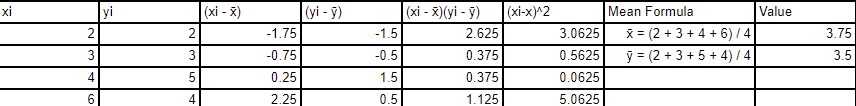


**Calculations**

Σ(xi - x̄)(yi - ȳ) = 2.625 + 0.375 + 0.375 + 1.125 = 4.5 

Σ(xi - x̄)² =  3.0625 + 0.5625 + 0.0625 + 5.0625 = 8.75

Slope = m = Σ(xi - x̄)(yi - ȳ) / Σ(xi - x̄)² = 4.5 / 8.75 = **0.514285714**

y-intercept = b = ȳ - m * x̄ = 3.5 - (0.514285714 * 3.75) = **1.57142857**


y = 0.514285714x + 1.57142857

Step 4: Show how covariance matrix is calculated using python. Print the value.

In [3]:
data = np.column_stack((x, y))
covariance_matrix = np.cov(data, rowvar=False)

print(f"Covariance Matrix: {covariance_matrix}")


Covariance Matrix: [[2.91666667 1.5       ]
 [1.5        1.66666667]]


Step 5: Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce covariance matrix.


**Given Data Points:** {<2, 2 >, <3, 3 >, <4, 5>, <6, 4>}

**And mean values:**

x_mean = (2 + 3 + 4 + 6) / 4 = 3.75

y_mean = (2 + 3 + 5 + 4) / 4 = 3.5

**Deviations from the mean:**

mean -  item

x = (-1.75, -0.75, 0.25, 2.25)
y = (-1.5, -0.5, 1.5, 0.5)

The sum of products here are (-1.75 * -1.5) + (-0.75 * -0.5) + (0.25 * 1.5) + (2.25 * 0.5) =  **4.5** so the covariance based on Cov(x, y) = 1 /  (n - 1) *  Σ[(xᵢ - x̄)(yᵢ - ȳ)] is 4.5 / 3 = **1.5**

**Do X and Y variance:**

Variance is 1 / (n - 1) *  Σ(xi - x̄)²


Var(x) = (-1.75^2 + -0.75^2 + 0.25^2 + 2.25^2) / 3 =  8.75 / 3  = **2.916667**

Var(y) = (-1.5^2 + -0.5^2 + 1.5^2 + 0.5^2) / 3 = 5 / 3 = **1.666667**




Step 6: Show how Pearson’s correlation coefficient is computed using python. Print the value.

In [4]:
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Pearson's correlation coefficient: {correlation_coefficient:.6f}")

print(np.std(x), np.std(y))


Pearson's correlation coefficient: 0.680336
1.479019945774904 1.118033988749895


Step 7: Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce Pearson’s correlation coefficient.

r = Σ(xi - x̄)(yi - ȳ)/(n * stdev(x)* stdev(y))

4.5 / (4 * 1.479019945774904 * 1.118033988749895) = 0.68

Step 8. This time, you use the nba.csv from HuskyCT. Produce a regression line for this data set using weight as dependent variable and height as independent variable. The plot should include data points and the regression line. The intercept and slope values should be included in the title of the plot where should appear at the top (centered in bold) above the plot.

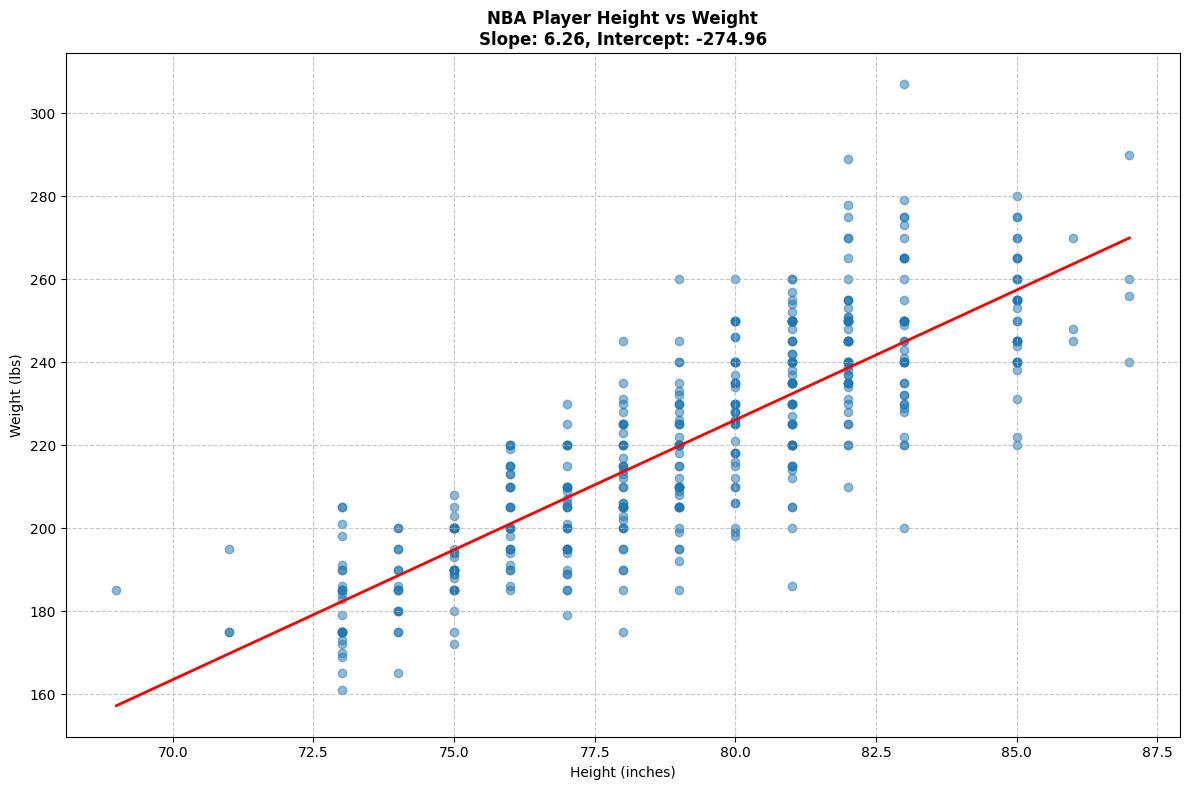

Regression equation: Weight = 6.26 * Height + -274.96


In [5]:
with open('nba.csv', 'r') as nbafile:
    nba_list_content = [item.split(',') for item in nbafile.read().split('\n')]
    
WEIGHT_COLUMN_INDEX = 6
HEIGHT_COLUMN_INDEX = 4
nba_player_heights = []
nba_player_weights = []

for item in nba_list_content:
    try:
        nba_player_heights.append(int(item[HEIGHT_COLUMN_INDEX]))
        nba_player_weights.append(int(item[WEIGHT_COLUMN_INDEX]))
                     
    except Exception:
        continue

heights = np.array(nba_player_heights)
weights = np.array(nba_player_weights)

slope, intercept = np.polyfit(heights, weights, 1)

plt.figure(figsize=(12, 8))
plt.scatter(heights, weights, alpha=0.5)

x_line = np.linspace(min(heights), max(heights), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2)

plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title(f'NBA Player Height vs Weight\nSlope: {slope:.2f}, Intercept: {intercept:.2f}', 
          fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.close()
print(f"Regression equation: Weight = {slope:.2f} * Height + {intercept:.2f}")

Step 9. Using the regression line in Step 8, compute and print the “predicted” weight for a unknown player whose height is 91. 

In [6]:
print(f"Predicted weight at Height 91: {(slope * 91 + intercept):.2f}")

Predicted weight at Height 91: 294.98


## **Part II: Scatter Plot with Pearson Correlation Coefficient**

Consider the article “Integrated systems approach identifies genetic nodes and networks in
lateonset Alzheimer's disease” Cell. 2013 Apr 25;153(3):707-20. PMID: 23622250; PMCID:
PMC3677161, by Zhang et al. The gene expression dataset published for this article GSE44768
is available at https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE44768. This dataset has
been preprocessed and some portion is available in HuskyCT. The article “GSE44768_article” is
also available in HW3 folder. Do Part II steps using only the data from the Dementia group
(GSE44768_CR_alz_female_reduced.csv). 

Step 1. Create and show two scatter plots, one comparing gene expression values between the
two genes (TYROBP and DOCK2) and the other comparing gene expression values between
TYROBP and GSTA4. Each plot should have the appropriate title including r (Pearson
correlation coefficient value). 

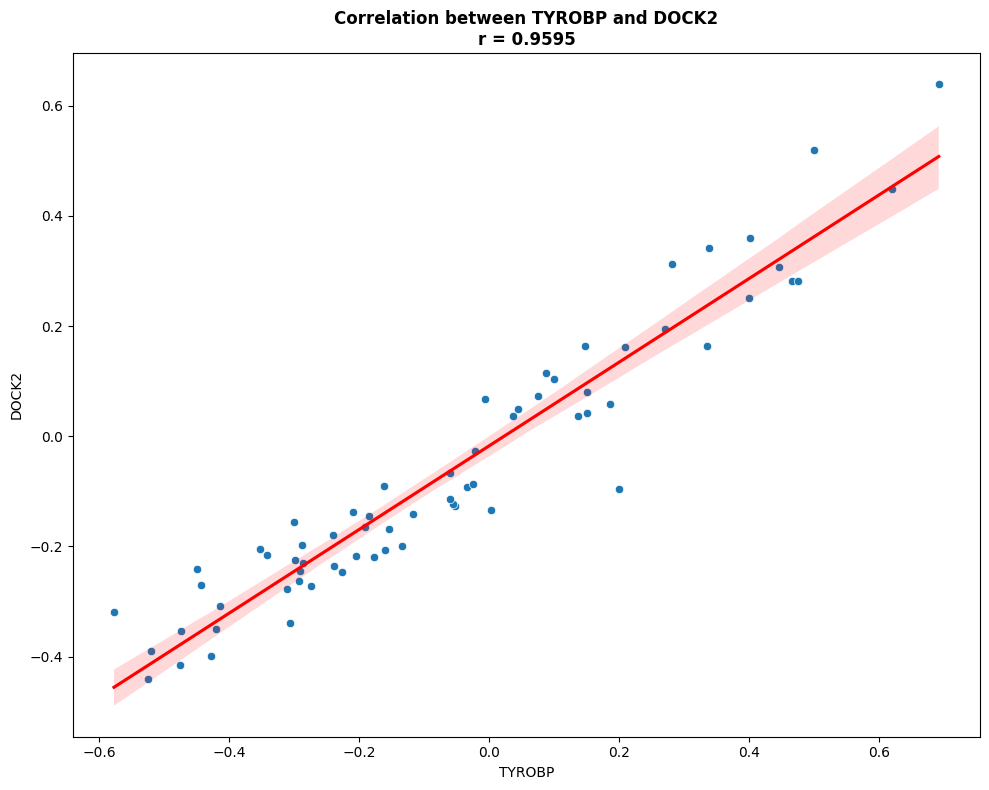

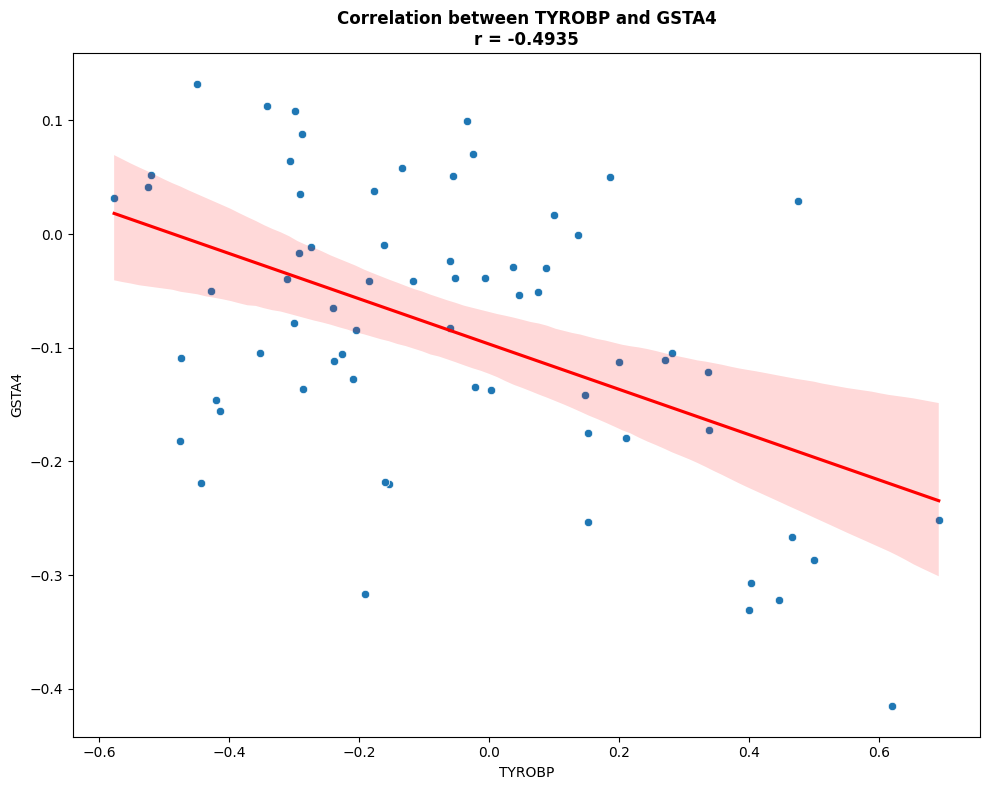

In [19]:
import pandas as pd
import seaborn as sns
from scipy import stats
def plot_gene_correlation(gene1, gene2, data):
    x = data[gene1]
    y = data[gene2]

    r, _ = stats.pearsonr(x, y)
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x, y=y)
    plt.xlabel(f'{gene1} Expression')
    plt.ylabel(f'{gene2} Expression')
    plt.title(f'Correlation between {gene1} and {gene2}\nr = {r:.4f}', fontweight='bold')
    
    sns.regplot(x=x, y=y, scatter=False, color='red')
    
    plt.tight_layout()
    plt.show()

data = pd.read_csv('GSE44768_CR_alz_female_reduced.csv', index_col=0)

plot_gene_correlation('TYROBP', 'DOCK2', data)
plot_gene_correlation('TYROBP', 'GSTA4', data)

Step 2. Create and show two scatter plots, one comparing gene expression values between
TYROBP and FCER1G and the other comparing gene expression values between ACBD5 and
LMAN1. This time, both plots should appear side by side. Each plot should have the appropriate
title including r. 

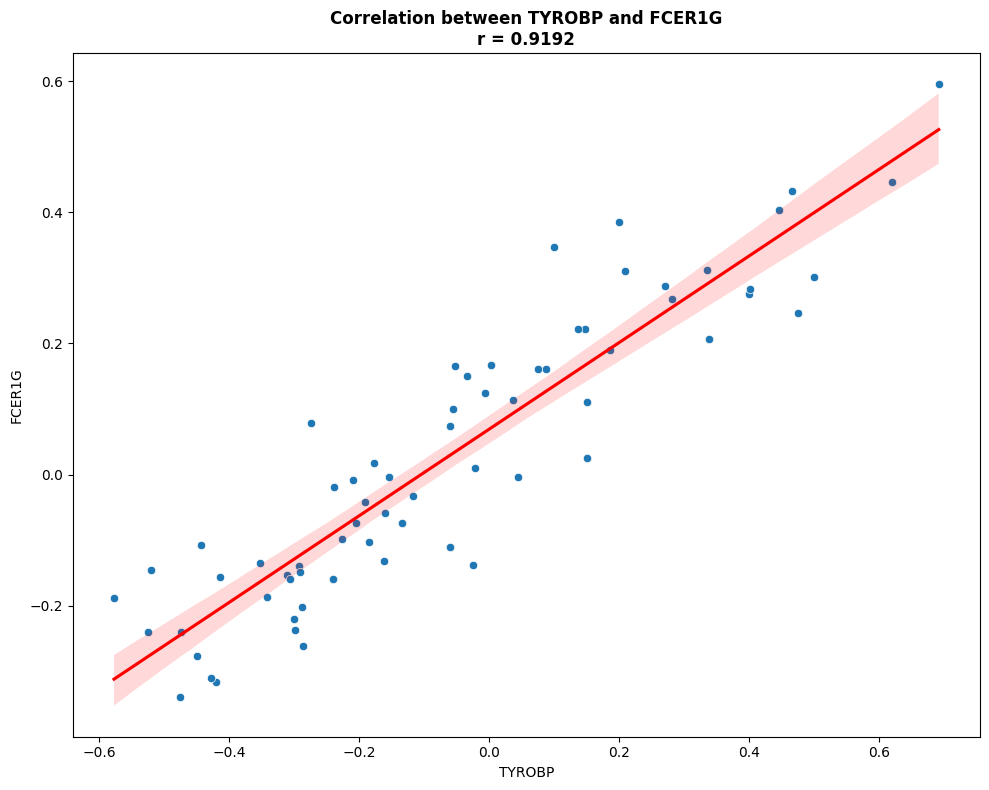

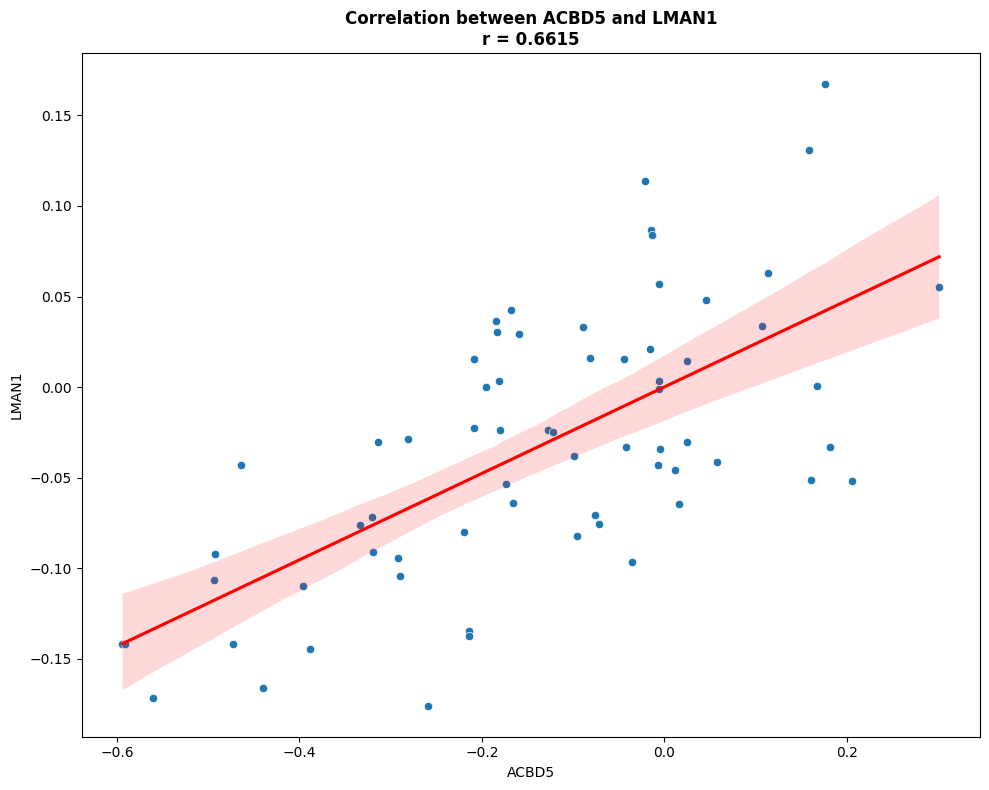

In [8]:
plot_gene_correlation('TYROBP', 'FCER1G', data)
plot_gene_correlation('ACBD5', 'LMAN1', data)


## **Part III: Correlation Matrix and Heatmap**
Now you are analyzing multiple pairs of genes at the same time, i.e., you like to know which
pairs would exhibit good positive or negative correlations? Instead of all possible pairs, you will
examine pairs from only 10 genes. 

Step 1. Create and show a 10 x 10 correlation matrix in which TYROBP, DOCK2 and GSTA4
are included. For the other 7 genes, you can choose any from the list for the analysis. Do this
step using only the data from the Dementia group (GSE44768_CR_alz_female_reduced.csv).
Retain your gene order for the rest of Part III analysis,

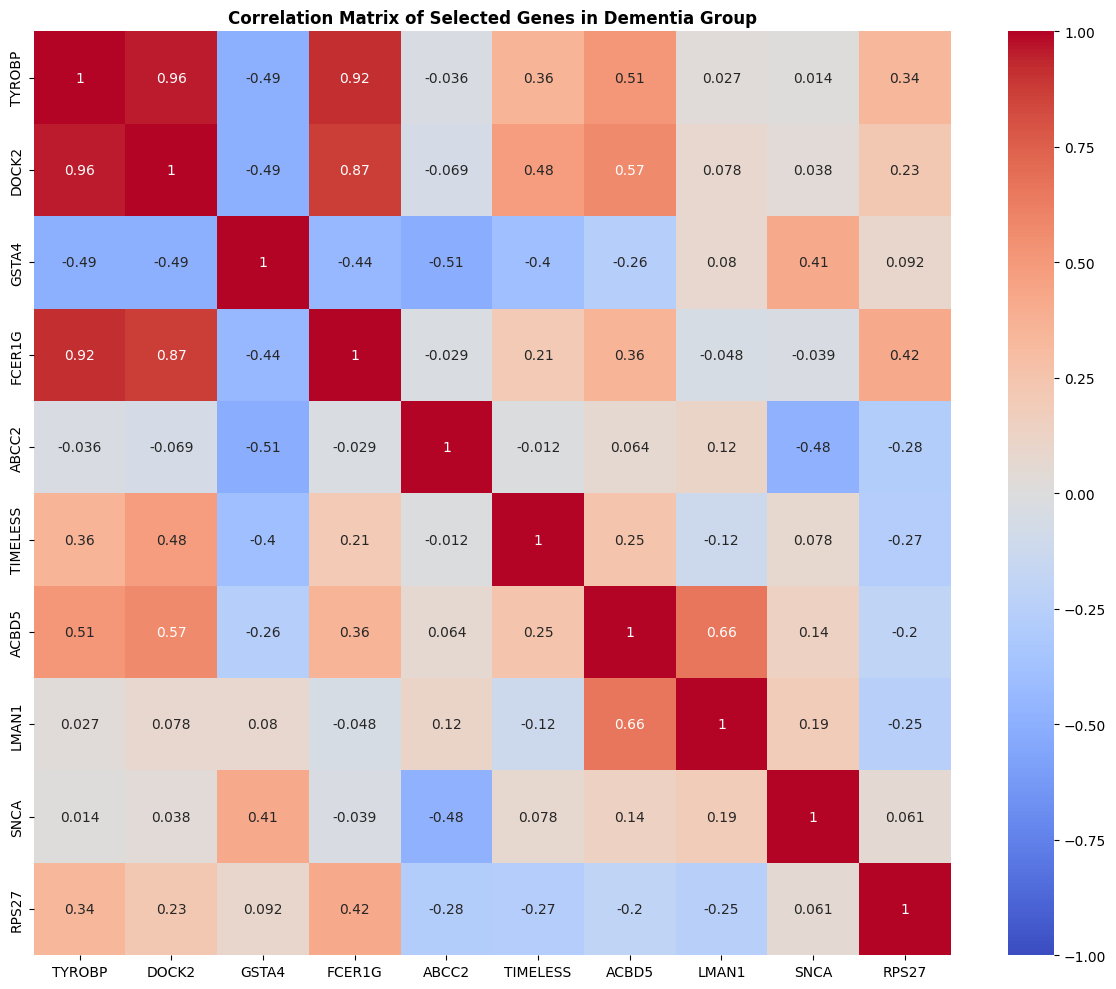

In [9]:
data = pd.read_csv('GSE44768_CR_alz_female_reduced.csv', index_col=0)
selected_genes = ['TYROBP', 'DOCK2', 'GSTA4', 'FCER1G', 'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'SNCA', 'RPS27']
selected_data = data[selected_genes]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Selected Genes in Dementia Group', fontweight='bold')
plt.tight_layout()
plt.show()



Step 2. Convert correlation matrix you generated in Step 2 into a correlation coefficient heatmap
and show. A heatmap is a two-dimensional graphical representation of data where the
individual values that are contained in a matrix are represented as colours. The Seaborn
package allows the creation of annotated heatmaps. You are required to add title and axis
labels appropriately. Do this step using only the data from the Dementia group
(GSE44768_CR_alz_female_reduced.csv). 

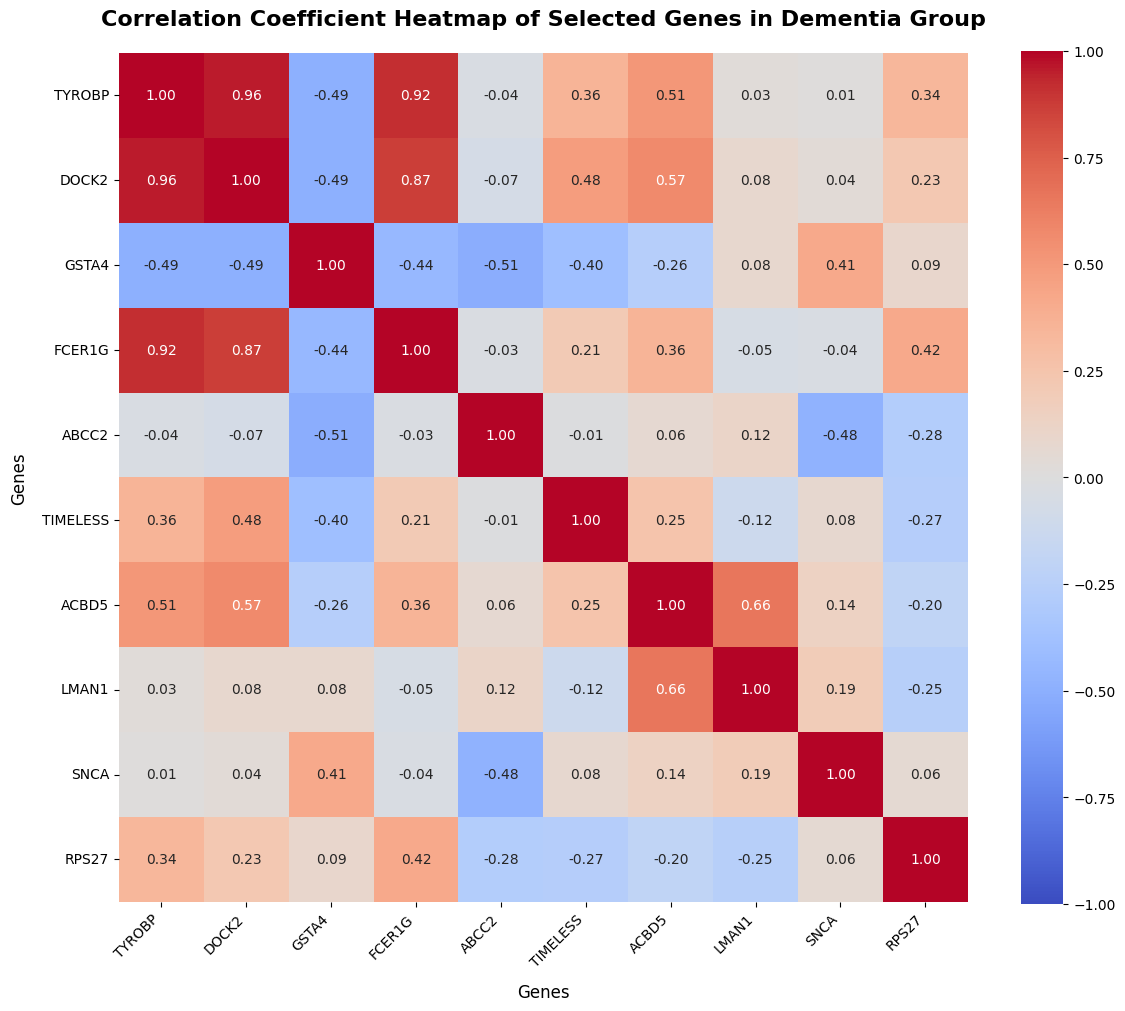

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True,fmt='.2f')  

plt.title('Correlation Coefficient Heatmap of Selected Genes in Dementia Group', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genes', fontsize=12, labelpad=10)
plt.ylabel('Genes', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Step 3. This time repeat Steps 1 and 2 for the data from the Non-Dementia group
(GSE44768_CR_nd_female_reduced.csv). 

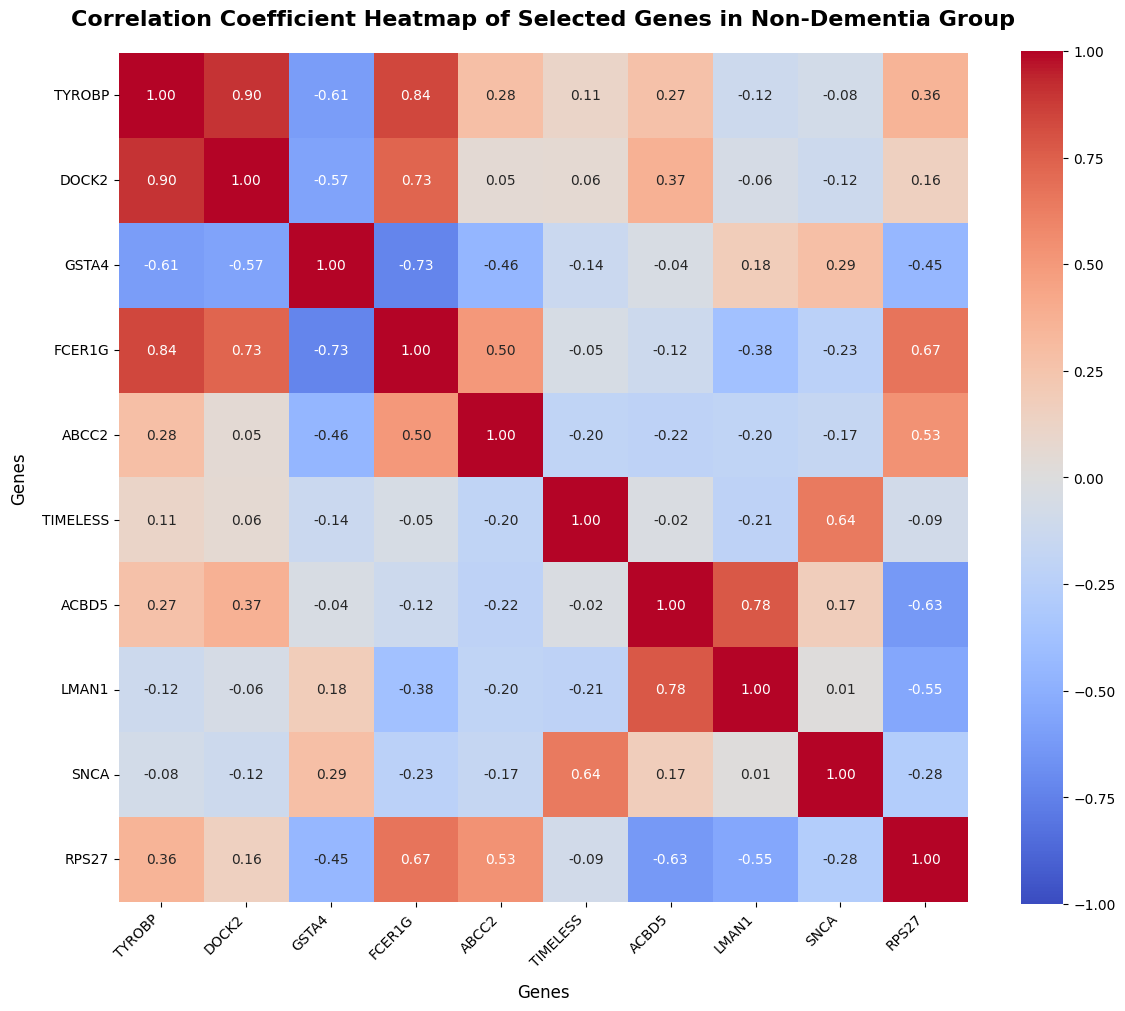

In [14]:
data = pd.read_csv('GSE44768_CR_nd_female_reduced.csv', index_col=0)
selected_genes = ['TYROBP', 'DOCK2', 'GSTA4', 'FCER1G', 'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'SNCA', 'RPS27']
selected_data = data[selected_genes]

correlation_matrix = selected_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True,fmt='.2f')  

plt.title('Correlation Coefficient Heatmap of Selected Genes in Non-Dementia Group', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genes', fontsize=12, labelpad=10)
plt.ylabel('Genes', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Step 4. Plot the heatmaps (not correlation matrix) you generated from Steps 2 and 3 side by side. 

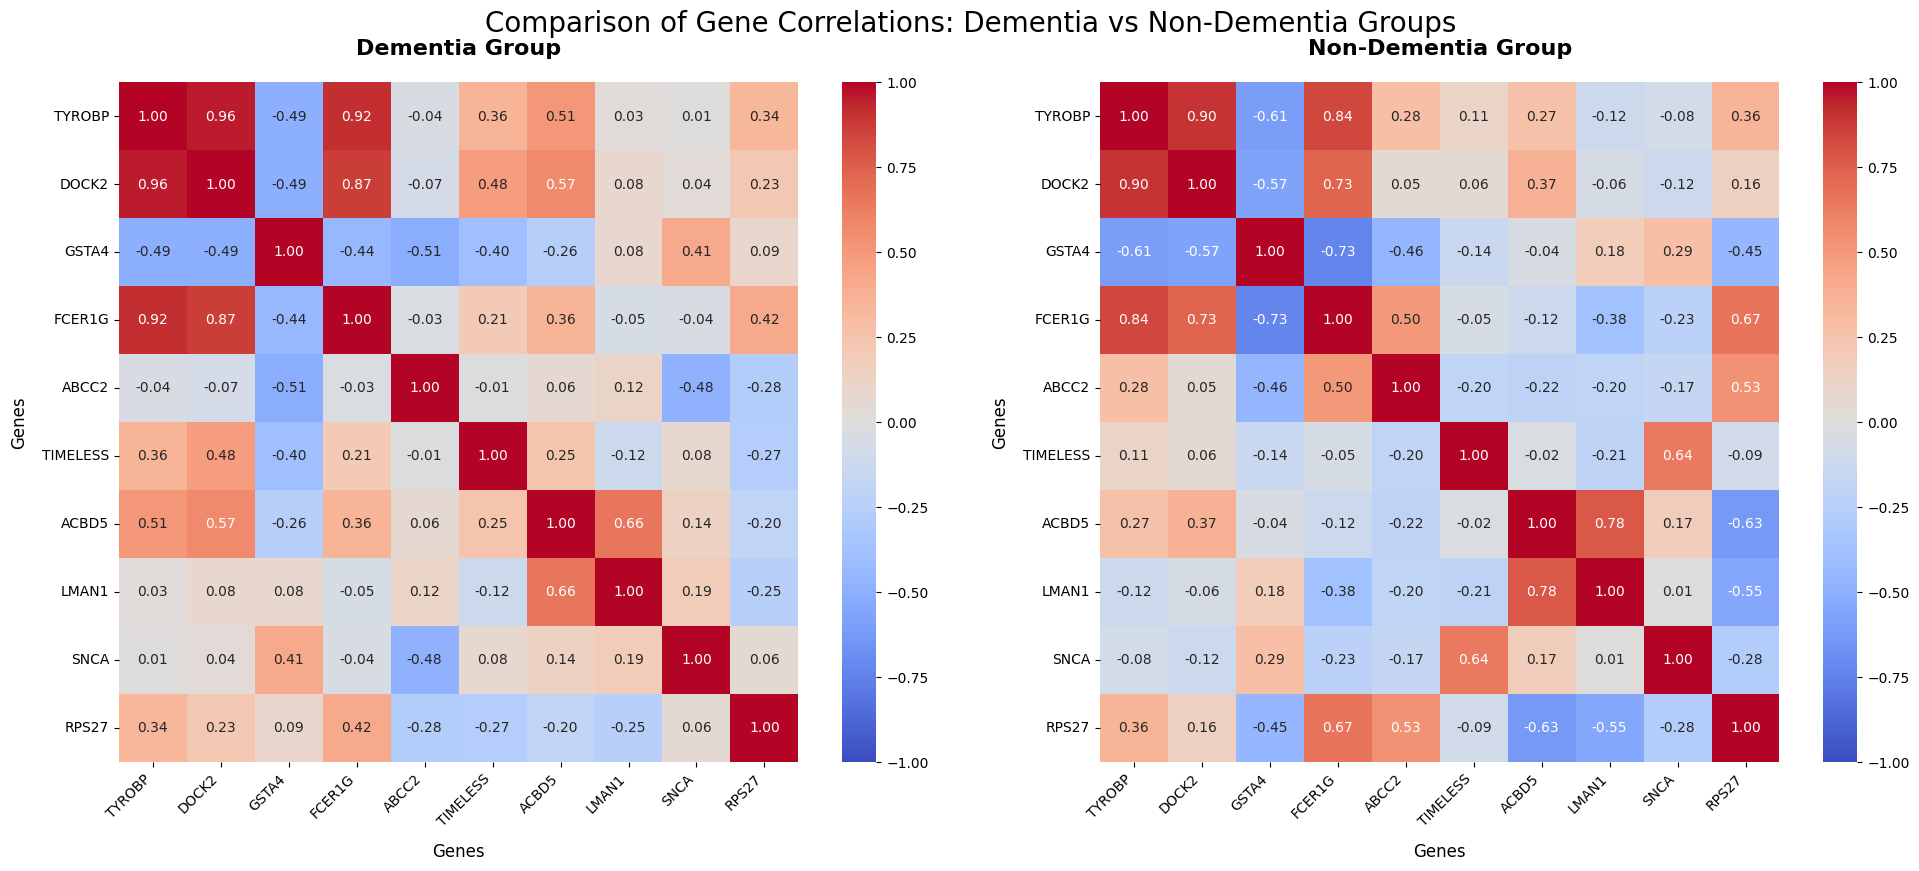

In [18]:
def create_correlation_matrix(file_path, selected_genes):
    data = pd.read_csv(file_path, index_col=0)
    selected_data = data[selected_genes]
    return selected_data.corr()

def create_heatmap(ax, corr_matrix, title):
    sns.heatmap(corr_matrix, ax=ax,annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, fmt='.2f')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Genes', fontsize=12, labelpad=10)
    ax.set_ylabel('Genes', fontsize=12, labelpad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


selected_genes = ['TYROBP', 'DOCK2', 'GSTA4', 'FCER1G', 'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'SNCA', 'RPS27']
dementia_corr = create_correlation_matrix('GSE44768_CR_alz_female_reduced.csv', selected_genes)
non_dementia_corr = create_correlation_matrix('GSE44768_CR_nd_female_reduced.csv', selected_genes)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
create_heatmap(ax1, dementia_corr, 'Dementia Group')
create_heatmap(ax2, non_dementia_corr, 'Non-Dementia Group')

plt.tight_layout()
plt.suptitle('Comparison of Gene Correlations: Dementia vs Non-Dementia Groups', fontsize=20, y=1.05)
plt.show()

Step 5. Create a markdown cell and discuss your comparison between the two heatmaps you are
showing side by side in Step 4. Do you see any noticeable difference? 

The dementia groups appears to be generally stronger correlated between genes, likely due to a more tight gene expression. Within the context of dementia, it seems that relationships between genes such as TIMELESS and SNCA which go from strongly to weakly correlated.

## **Part IV: Review of Histogram/Boxplot/Violinplot**
Consider again the gene expression data set introduced in Part II. You would like to compare
histograms for TYROBP’s gene expression levels between the two cohorts, the Dementia group
(GSE44768_CR_alz_female_reduced.csv) and the Non-Dementia group
(GSE44768_CR_nd_female_reduced.csv). Label each plot appropriately including color legend. 

Step 1. Create and show two histograms for TYROBP’s gene expression level for the Dementia
group and the Non-Dementia group, individually, side by side. 

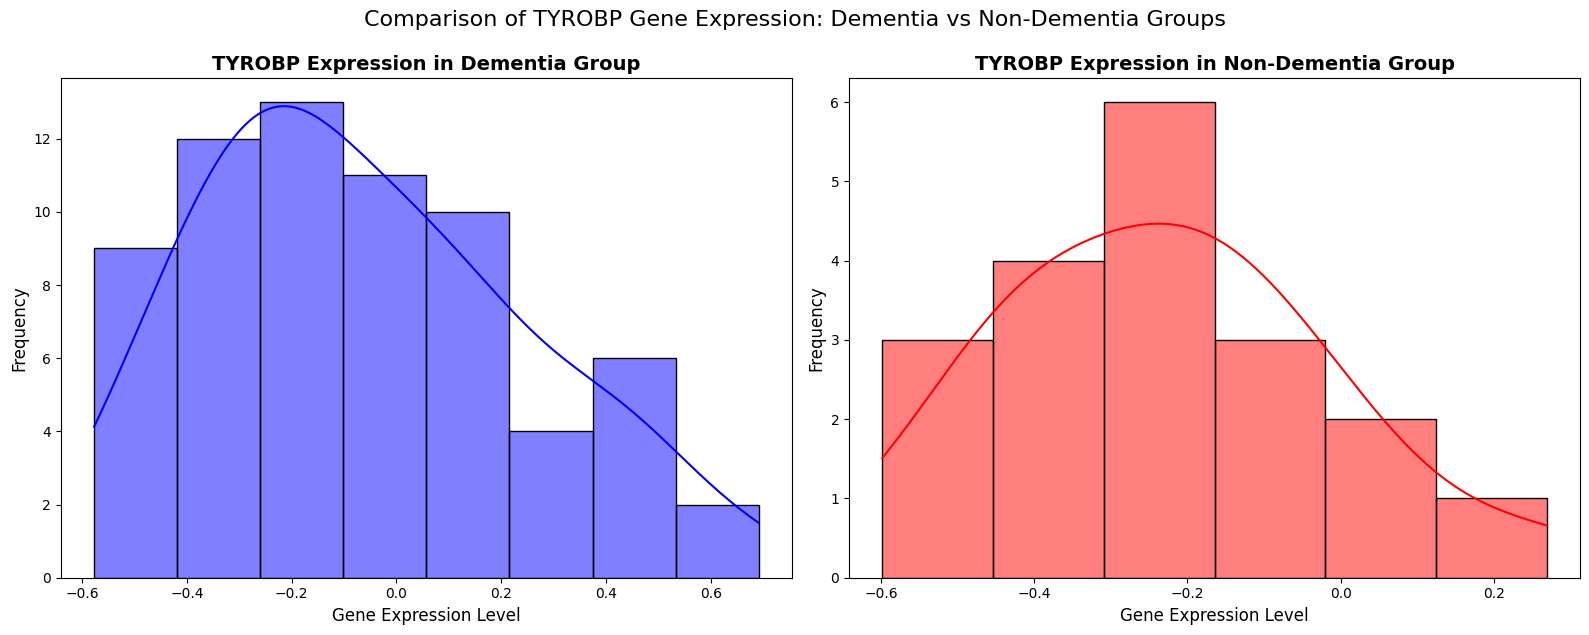

In [22]:
def load_tyrobp_data(file_path):
    data = pd.read_csv(file_path, index_col=0)
    return data['TYROBP']

def create_histogram(ax, data, title, color):
    sns.histplot(data, ax=ax, kde=True, color=color)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Gene Expression Level', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

dementia_tyrobp = load_tyrobp_data('GSE44768_CR_alz_female_reduced.csv')
non_dementia_tyrobp = load_tyrobp_data('GSE44768_CR_nd_female_reduced.csv')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


create_histogram(ax1, dementia_tyrobp, 'TYROBP Expression in Dementia Group', 'blue')
create_histogram(ax2, non_dementia_tyrobp, 'TYROBP Expression in Non-Dementia Group', 'red')

plt.tight_layout()
plt.suptitle('Comparison of TYROBP Gene Expression: Dementia vs Non-Dementia Groups', fontsize=16, y=1.05)
plt.show()

Step 2. This time, merge both histograms with different colors, blue for the Dementia group and
red for the Non-Dementia group, into one plot. 

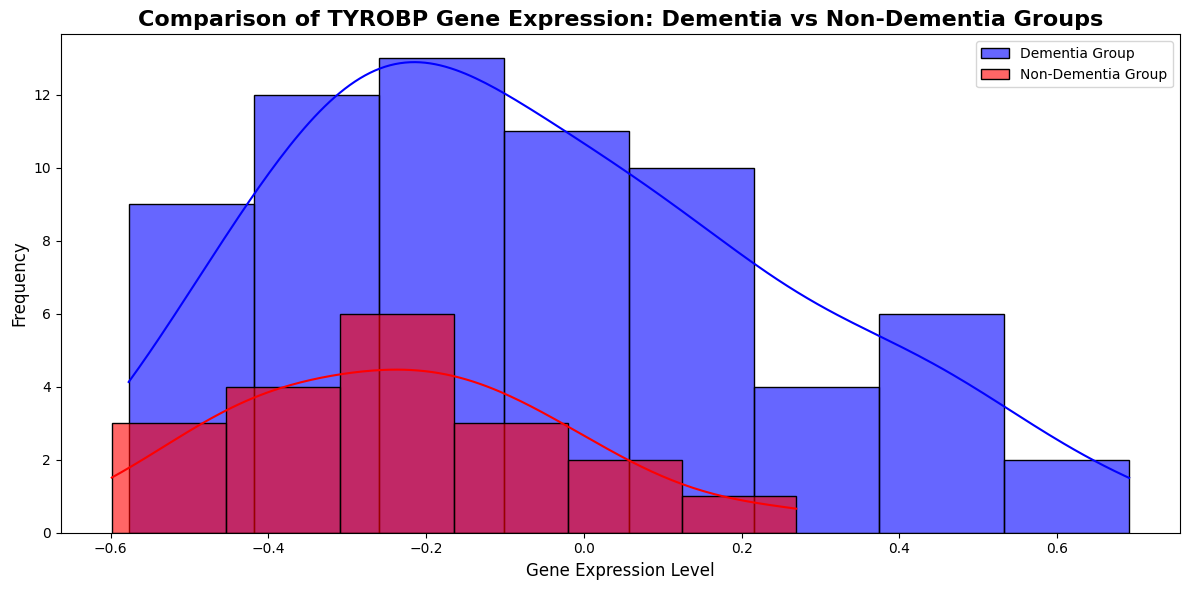

In [23]:
plt.figure(figsize=(12, 6))

sns.histplot(dementia_tyrobp, kde=True, color='blue', label='Dementia Group', alpha=0.6)
sns.histplot(non_dementia_tyrobp, kde=True, color='red', label='Non-Dementia Group', alpha=0.6)

plt.title('Comparison of TYROBP Gene Expression: Dementia vs Non-Dementia Groups', fontsize=16, fontweight='bold')
plt.xlabel('Gene Expression Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Step 3. This time, create and show boxplots for TYROBP’s gene expression level both for the
Dementia group and the Non-Dementia group in one plot, side by side. 

C:\Users\oshom\AppData\Local\Temp\ipykernel_24632\1614617425.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='TYROBP', data=combined_data, palette={'Dementia': 'blue', 'Non-Dementia': 'red'})


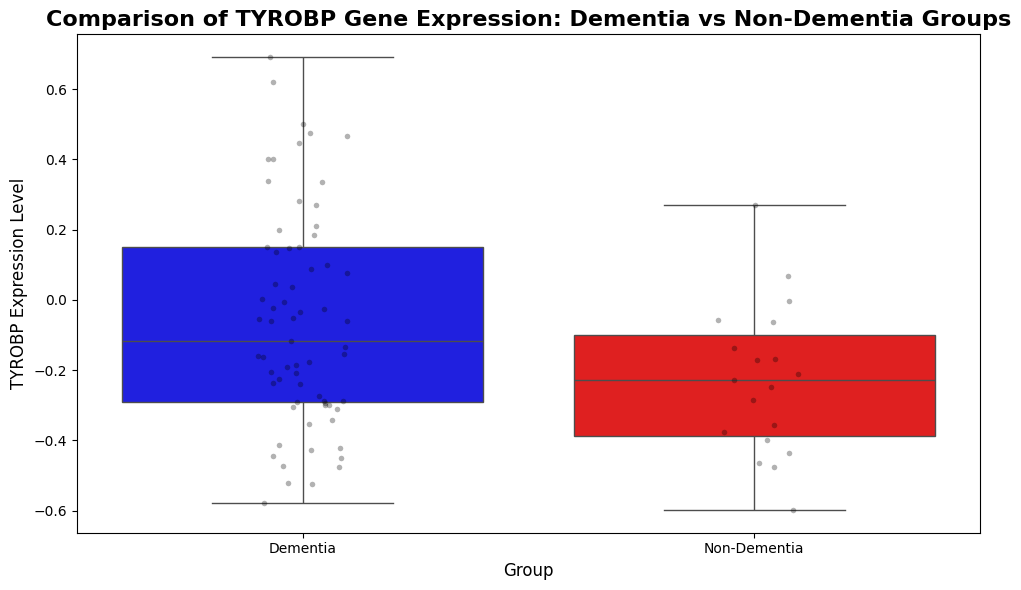

In [24]:
def load_tyrobp_data(file_path, group_name):
    data = pd.read_csv(file_path, index_col=0)
    return pd.DataFrame({'TYROBP': data['TYROBP'], 'Group': group_name})

dementia_data = load_tyrobp_data('GSE44768_CR_alz_female_reduced.csv', 'Dementia')
non_dementia_data = load_tyrobp_data('GSE44768_CR_nd_female_reduced.csv', 'Non-Dementia')
combined_data = pd.concat([dementia_data, non_dementia_data])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='TYROBP', data=combined_data, palette={'Dementia': 'blue', 'Non-Dementia': 'red'})
sns.stripplot(x='Group', y='TYROBP', data=combined_data, color='black', size=4, alpha=0.3)
plt.title('Comparison of TYROBP Gene Expression: Dementia vs Non-Dementia Groups', fontsize=16, fontweight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('TYROBP Expression Level', fontsize=12)
plt.tight_layout()
plt.show()

Step 4. Repeat Step 3 using violinplot again in one plot, side by side. 

C:\Users\oshom\AppData\Local\Temp\ipykernel_24632\4111139945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='TYROBP', data=combined_data, palette={'Dementia': 'blue', 'Non-Dementia': 'red'})


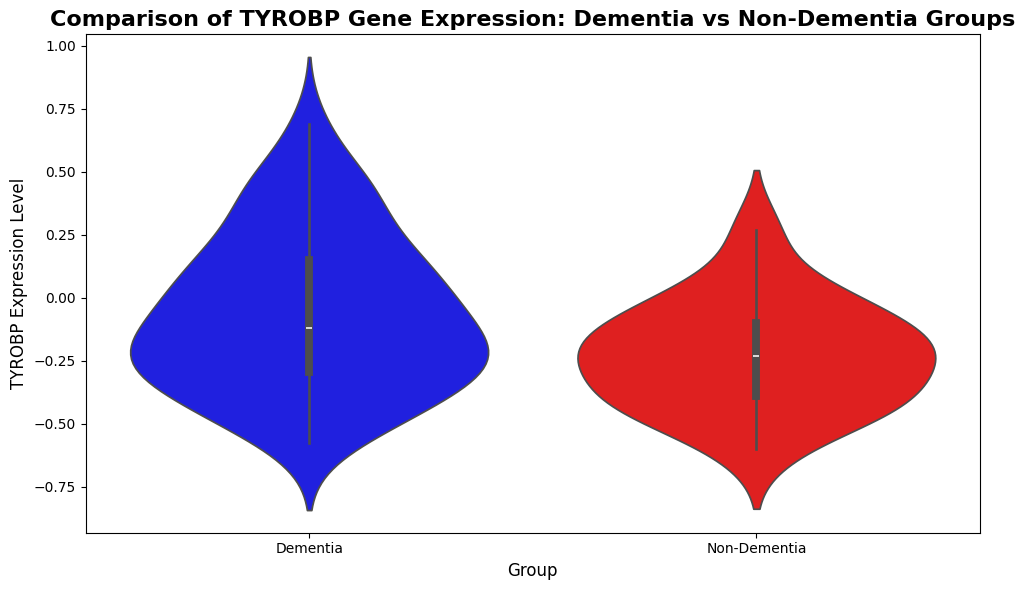

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='TYROBP', data=combined_data, palette={'Dementia': 'blue', 'Non-Dementia': 'red'})

plt.title('Comparison of TYROBP Gene Expression: Dementia vs Non-Dementia Groups', fontsize=16, fontweight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('TYROBP Expression Level', fontsize=12)
plt.tight_layout()
plt.show()

Step 5. Create a markdown cell to include your interpretation for comparing TYROBP gene
expression levels from the two cohorts. We are not interested in checking if your answer is right
or not from the perspective of Alzheimer’s Disease but we will check if your reasoning based on
your plots is sound or not.

The Violin Plot Suggests that, while theres a slight tedency for the median to be higher in TYROBP expression, theres a relatively striking difference in the overall variability of the levels of expression observed here. The dementia group has a wider range of TYROBP expression, suggesting a likely more heterogenous response.